# Analysis for 2nd Hand : Car Resales Value And Sales Prediction -

In [1]:
import pandas as pd 

In [2]:
import os
os.getcwd()

os.chdir(r"/Users/aakashverma/Desktop")
os.getcwd()

'/Users/aakashverma/Desktop'

In [3]:
df = pd.read_csv('car.csv')

In [4]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
Sales_ID             7906 non-null int64
name                 7906 non-null object
year                 7906 non-null int64
selling_price        7906 non-null int64
km_driven            7906 non-null int64
Region               7906 non-null object
State or Province    7906 non-null object
City                 7906 non-null object
fuel                 7906 non-null object
seller_type          7906 non-null object
transmission         7906 non-null object
owner                7906 non-null object
mileage              7906 non-null object
engine               7906 non-null object
max_power            7906 non-null object
torque               7906 non-null object
seats                7906 non-null int64
sold                 7906 non-null object
dtypes: int64(5), object(13)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Sales_ID,year,selling_price,km_driven,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df["State or Province"].value_counts()

California              901
Texas                   499
New York                491
Illinois                489
Florida                 425
Ohio                    321
Michigan                305
Washington              295
Pennsylvania            235
North Carolina          222
Indiana                 213
Massachusetts           191
Georgia                 187
Minnesota               169
Virginia                167
Colorado                154
New Jersey              154
Maryland                144
Missouri                141
Tennessee               135
Utah                    133
Oregon                  129
Iowa                    123
Wisconsin               117
Arizona                 115
Kansas                  112
Maine                   110
Arkansas                107
Alabama                 106
Oklahoma                 95
Idaho                    89
South Carolina           81
New Mexico               71
District of Columbia     68
Louisiana                66
Mississippi         

In [8]:
df["Region"].value_counts()

Central    2376
West       1976
East       1939
South      1615
Name: Region, dtype: int64

In [9]:
len(df["City"].unique())

1310

In [10]:
df.mileage = df.mileage.apply(lambda x:x.split()[0]).astype(float)
df.engine = df.engine.apply(lambda x:x.split()[0]).astype(int)
df.max_power = df.max_power.apply(lambda x:x.split()[0]).astype(float)

In [11]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [12]:
df["seats"].value_counts()

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64

In [13]:
df.skew()

Sales_ID         -0.003201
year             -0.994973
selling_price     4.156864
km_driven        11.342853
mileage          -0.142391
engine            1.135359
max_power         1.639673
seats             1.971052
dtype: float64

In [14]:
df.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

In [15]:
categorical_columns = df.loc[:,['Region','State or Province','City','fuel','seller_type','transmission','owner']]
# df.iloc[:,5:-6]

In [16]:
categorical_columns.head()

,Region,State or Province,City,fuel,seller_type,transmission,owner
0,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner
1,East,New York,New York City,Diesel,Individual,Manual,Second Owner
2,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner
3,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner
4,East,New York,New York City,Petrol,Individual,Manual,First Owner


In [17]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 7 columns):
Region               7906 non-null object
State or Province    7906 non-null object
City                 7906 non-null object
fuel                 7906 non-null object
seller_type          7906 non-null object
transmission         7906 non-null object
owner                7906 non-null object
dtypes: object(7)
memory usage: 432.5+ KB


In [18]:
categorical_columns

,Region,State or Province,City,fuel,seller_type,transmission,owner
0,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner
1,East,New York,New York City,Diesel,Individual,Manual,Second Owner
2,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner
3,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner
4,East,New York,New York City,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...
7901,Central,Texas,Plano,Petrol,Individual,Manual,First Owner
7902,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth & Above Owner
7903,Central,Texas,Port Arthur,Diesel,Individual,Manual,First Owner
7904,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner


In [19]:
categorical_columns.iloc[:,4:6]

,seller_type,transmission
0,Individual,Manual
1,Individual,Manual
2,Individual,Manual
3,Individual,Manual
4,Individual,Manual
...,...,...
7901,Individual,Manual
7902,Individual,Manual
7903,Individual,Manual
7904,Individual,Manual


In [20]:
categorical_columns["seller_type"].shape
categorical_columns["transmission"].shape

(7906,)

In [21]:
df.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

In [22]:
# df_train_dummies = pd.get_dummies(df_train, columns=['Transmission'], drop_first=True)
# df_test_dummies = pd.get_dummies(df_test, columns=['Transmission'], drop_first=True)
# df_train_dummies = df_train_dummies.drop(columns=['Name'])
# df_train_dummies = df_train_dummies.drop(columns=['New_Price'])
# df_train_dummies = df_train_dummies.drop(columns=['Location'])
# df_test_dummies = df_test_dummies.drop(columns=['Name'])
# df_test_dummies = df_test_dummies.drop(columns=['New_Price'])
# df_test_dummies = df_test_dummies.drop(columns=['Location'])
# df_train_dummies['Fuel_Type'] = df_train_dummies['Fuel_Type'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4})
# df_train_dummies['Owner_Type'] = df_train_dummies['Owner_Type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})
# df_test_dummies['Fuel_Type'] = df_test_dummies['Fuel_Type'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4,'Electric':5})
# df_test_dummies['Owner_Type'] = df_test_dummies['Owner_Type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

In [23]:
# # Encoding categorical data

# # Encoding the Independent Variable
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder

# # labelencoder_X = LabelEncoder()
# # categorical_columns.iloc[:,4:6] = labelencoder_X.fit_transform(categorical_columns.iloc[:,4:6])
# onehotencoder = OneHotEncoder()
# categorical_values = onehotencoder.fit_transform(categorical_columns).toarray()



In [24]:
categorical_columns 

,Region,State or Province,City,fuel,seller_type,transmission,owner
0,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner
1,East,New York,New York City,Diesel,Individual,Manual,Second Owner
2,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner
3,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner
4,East,New York,New York City,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...
7901,Central,Texas,Plano,Petrol,Individual,Manual,First Owner
7902,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth & Above Owner
7903,Central,Texas,Port Arthur,Diesel,Individual,Manual,First Owner
7904,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner


In [25]:
categorical_columns

,Region,State or Province,City,fuel,seller_type,transmission,owner
0,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner
1,East,New York,New York City,Diesel,Individual,Manual,Second Owner
2,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner
3,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner
4,East,New York,New York City,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...
7901,Central,Texas,Plano,Petrol,Individual,Manual,First Owner
7902,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth & Above Owner
7903,Central,Texas,Port Arthur,Diesel,Individual,Manual,First Owner
7904,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner


In [26]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [27]:
# dfe = pd.concat([df, categorical_columns], axis=1)
df= df.drop(["State or Province","City","torque"],axis = 1)

In [28]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Y


In [29]:
df["Region"].value_counts()

Central    2376
West       1976
East       1939
South      1615
Name: Region, dtype: int64

In [30]:
Car_Company = df['name']
num = len(df['name'])
car_maker = []
for i in range (0,num):
    car_maker.append(df['name'][i].split()[0])
    print(car_maker)
df['Car_Company'] = car_maker
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Toyota', 'Ford', 'Renault', 'Maruti', 'Maruti', 'Maruti', 'Mahindra', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Mahindra', 'Honda', 'Maruti', 'Maruti', 'Tata', 'Maruti', 'Maruti', 'Chevrolet', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Datsun', 'Tata', 'Maruti', 'Jeep', 'Honda', 'Honda', 'Maruti', 'Maruti', 'Maruti', 'Toyota', 'Toyota', 'Mercedes-Benz', 'Honda', 'Mitsubishi', 'Honda', 'Maruti', 'Honda', 'Toyota', 'Toyota', 'Audi', 'Toyota', 'Audi', 'Mercedes-Benz', 'Tata', 'Hyundai', 'Hyundai', 'Maruti', 'Ford', 'Maruti', 'Volkswagen', 'Honda', 'Maruti', 'Volkswagen', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Toyota', 'Maruti', 'Maruti', 'Volkswagen', 'Toyota', 'Ford', 'BMW', 'Maruti', 'Datsun', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Volkswagen', 'Hyundai', 'Volkswagen', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Toyota', 'Ford', 'Renault', 'Maruti', 'Maruti', 'Maruti', 'Mahindra', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Mahindra', 'Honda', 'Maruti', 'Maruti', 'Tata', 'Maruti', 'Maruti', 'Chevrolet', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Datsun', 'Tata', 'Maruti', 'Jeep', 'Honda', 'Honda', 'Maruti', 'Maruti', 'Maruti', 'Toyota', 'Toyota', 'Mercedes-Benz', 'Honda', 'Mitsubishi', 'Honda', 'Maruti', 'Honda', 'Toyota', 'Toyota', 'Audi', 'Toyota', 'Audi', 'Mercedes-Benz', 'Tata', 'Hyundai', 'Hyundai', 'Maruti', 'Ford', 'Maruti', 'Volkswagen', 'Honda', 'Maruti', 'Volkswagen', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Toyota', 'Maruti', 'Maruti', 'Volkswagen', 'Toyota', 'Ford', 'BMW', 'Maruti', 'Datsun', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Volkswagen', 'Hyundai', 'Volkswagen', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Car_Company
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Y,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y,Skoda
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Y,Honda
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Y,Hyundai
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Y,Maruti


In [32]:
df.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'sold', 'Car_Company'],
      dtype='object')

In [33]:
df=df[['Sales_ID','Car_Company', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'sold']]

In [34]:
df= df.drop(["Car_Company","name"],axis = 1)

In [35]:
df.head()

,Sales_ID,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,2014,450000,145500,East,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Y
1,2,2014,370000,120000,East,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y
2,3,2006,158000,140000,Central,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Y
3,4,2010,225000,127000,Central,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Y
4,5,2007,130000,120000,East,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Y


In [36]:
X=df.drop(['sold'],axis=1)

In [37]:
X

,Sales_ID,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,East,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2,2014,370000,120000,East,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,3,2006,158000,140000,Central,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,4,2010,225000,127000,Central,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,5,2007,130000,120000,East,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,2013,320000,110000,Central,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
7902,8125,2007,135000,119000,Central,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5
7903,8126,2009,382000,120000,Central,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5
7904,8127,2013,290000,25000,East,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5


In [38]:
y= pd.DataFrame(df.sold)

In [39]:
y

,sold
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
7901,N
7902,N
7903,N
7904,N


In [40]:
dummies = pd.get_dummies(df[['Region','transmission','fuel','seller_type','owner']], drop_first=True)

In [41]:
dummies

,Region_East,Region_South,Region_West,transmission_Manual,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1,0,0,1,1,0,0,1,0,0,0,0,0
1,1,0,0,1,1,0,0,1,0,0,1,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,1
3,0,0,0,1,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,0,0,0,1,0,0,1,1,0,0,0,0,0
7902,0,0,0,1,1,0,0,1,0,1,0,0,0
7903,0,0,0,1,1,0,0,1,0,0,0,0,0
7904,1,0,0,1,1,0,0,1,0,0,0,0,0


In [42]:
X = df.drop(['Region','transmission','fuel','seller_type','owner',"sold"],axis=1)

In [43]:
X

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
0,1,2014,450000,145500,23.40,1248,74.00,5
1,2,2014,370000,120000,21.14,1498,103.52,5
2,3,2006,158000,140000,17.70,1497,78.00,5
3,4,2010,225000,127000,23.00,1396,90.00,5
4,5,2007,130000,120000,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...
7901,8124,2013,320000,110000,18.50,1197,82.85,5
7902,8125,2007,135000,119000,16.80,1493,110.00,5
7903,8126,2009,382000,120000,19.30,1248,73.90,5
7904,8127,2013,290000,25000,23.57,1396,70.00,5


In [44]:
X = pd.concat([X, dummies], axis=1)

In [45]:
X

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,Region_East,Region_South,...,transmission_Manual,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1,2014,450000,145500,23.40,1248,74.00,5,1,0,...,1,1,0,0,1,0,0,0,0,0
1,2,2014,370000,120000,21.14,1498,103.52,5,1,0,...,1,1,0,0,1,0,0,1,0,0
2,3,2006,158000,140000,17.70,1497,78.00,5,0,0,...,1,0,0,1,1,0,0,0,0,1
3,4,2010,225000,127000,23.00,1396,90.00,5,0,0,...,1,1,0,0,1,0,0,0,0,0
4,5,2007,130000,120000,16.10,1298,88.20,5,1,0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,2013,320000,110000,18.50,1197,82.85,5,0,0,...,1,0,0,1,1,0,0,0,0,0
7902,8125,2007,135000,119000,16.80,1493,110.00,5,0,0,...,1,1,0,0,1,0,1,0,0,0
7903,8126,2009,382000,120000,19.30,1248,73.90,5,0,0,...,1,1,0,0,1,0,0,0,0,0
7904,8127,2013,290000,25000,23.57,1396,70.00,5,1,0,...,1,1,0,0,1,0,0,0,0,0


In [46]:
y = pd.get_dummies(df[['sold']], drop_first=True)

In [47]:
y

,sold_Y
0,1
1,1
2,1
3,1
4,1
...,...
7901,0
7902,0
7903,0
7904,0


In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
X_train.head()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,Region_East,Region_South,...,transmission_Manual,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
6848,7043,2008,700000,260000,12.80,2494,102.00,8,0,0,...,1,1,0,0,1,0,0,0,0,0
2091,2157,2018,610000,15000,18.60,1197,81.83,5,0,0,...,1,0,0,1,1,0,0,0,0,0
1525,1574,2012,550000,57728,14.53,1794,138.10,5,0,0,...,0,0,0,1,0,1,0,0,0,0
4111,4235,2017,2711000,9000,13.60,1999,177.00,5,0,1,...,0,1,0,0,0,0,0,0,0,0
3443,3553,2010,250000,100000,17.50,1896,106.00,5,0,0,...,1,1,0,0,1,0,0,1,0,0


In [50]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5534 entries, 6848 to 2732
Data columns (total 1 columns):
sold_Y    5534 non-null uint8
dtypes: uint8(1)
memory usage: 48.6 KB


In [51]:
import numpy as np
sold = np.where(df['sold']=="Y")

In [52]:
sold

(array([   0,    1,    2, ..., 1997, 1998, 1999]),)

In [53]:
car_sold = df.loc[sold].groupby('seller_type')['sold'].count()

In [54]:
car_sold

seller_type
Dealer               291
Individual          1629
Trustmark Dealer      80
Name: sold, dtype: int64

In [55]:
df.groupby(['sold','owner']).Sales_ID.count()

sold  owner               
N     First Owner             3889
      Fourth & Above Owner     111
      Second Owner            1526
      Test Drive Car             5
      Third Owner              375
Y     First Owner             1326
      Fourth & Above Owner      49
      Second Owner             490
      Third Owner              135
Name: Sales_ID, dtype: int64

In [56]:
%matplotlib inline

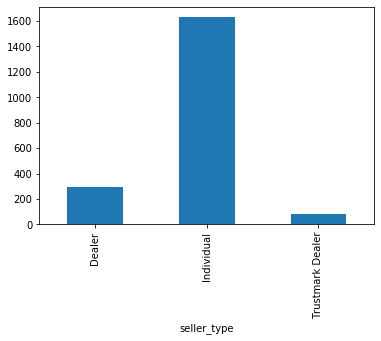

In [57]:
car_sold.plot(kind ="bar")

In [59]:
# Using Simple Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred = pd.DataFrame(regressor.predict(X_train))
x_pred = pd.DataFrame(regressor.predict(X_test))

In [61]:
y_pred

,0
0,-0.188523
1,0.510061
2,0.634000
3,0.238830
4,0.320708
...,...
5529,0.093559
5530,0.343729
5531,0.564736
5532,0.431698


In [62]:
x_pred

,0
0,0.253770
1,0.196446
2,0.109395
3,-0.096435
4,0.830951
...,...
2367,0.258845
2368,0.244112
2369,0.191195
2370,0.552390


In [ ]:
correlations = pd.

In [64]:
# def get_features(correlation_threshold):
#     abs_corrs = correlations.abs()
#     high_correlations = abs_corrs
#     [abs_corrs > correlation_threshold].index.values.tolist()
#     return high_correlations

# # # taking features with correlation more than 0.05 as input x and quality as target variable y 
# features = get_features(0.05) 
# print(features) 

NameError: name 'correlations' is not defined

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
import numpy as np

# calculating rmse
train_rmse = mean_squared_error(y_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(x_pred, y_test) ** 0.5
print(test_rmse)
# rounding off the predicted values for test set
predicted_data = np.round_(x_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, x_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, x_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, x_pred)))
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

0.28525810510498734
0.28491944258158824
        0
0     0.0
1     0.0
2     0.0
3    -0.0
4     1.0
...   ...
2367  0.0
2368  0.0
2369  0.0
2370  1.0
2371  1.0

[2372 rows x 1 columns]
Mean Absolute Error: 0.24878751705958432
Mean Squared Error: 0.08117908876100297
Root Mean Squared Error: 0.28491944258158824
